In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
np.random.seed(0)

In [ ]:
dataframe = pd.read_csv("/content/drive/My Drive/ML Project Taxi Fair/train.csv")

In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
#Save dataset without nan values
dataframe.to_csv("/content/drive/My Drive/ML Project Taxi Fair/Train_without_nan.csv", index=False)

In [ ]:
dataframe.isna().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64

In [ ]:
#Try to fit the data without any transeformation

#Convert labels for 1 and 0
#Before do describe, Let's convert the label as 1 and 0 .(1-correct and 0-incorrect)
def encoding_label(label):
  if(label=='correct'):
    return 1
  else:
    return 0

dataframe['label']= dataframe['label'].apply(encoding_label).values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [ ]:
X = dataframe.drop(columns=['label', 'tripid', 'drop_time', 'pickup_time']).values
Y = dataframe['label'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [ ]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]


grid = itertools.product([0,1],repeat=2)

for clf, label_, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, Y_train, cv=3, scoring='f1')
    print("%s F1 Socre: %.6f (+/- %.4f) " %(label_, scores.mean(), scores.std()))
    clf.fit(X_train, Y_train)

Decision Tree F1 Socre: 0.952704 (+/- 0.0001) 
K-NN F1 Socre: 0.959509 (+/- 0.0010) 
Bagging Tree F1 Socre: 0.952704 (+/- 0.0001) 
Bagging K-NN F1 Socre: 0.962183 (+/- 0.0027) 


In [ ]:
for clf, label_ in zip(clf_list, label):     
  print("{0}  Accuracy score : {1}".format(label_, clf.score(X_validation, Y_validation)))

Decision Tree  Accuracy score : 0.9116087212728344
K-NN  Accuracy score : 0.9242781378903948
Bagging Tree  Accuracy score : 0.9116087212728344
Bagging K-NN  Accuracy score : 0.9322333529758398


In [ ]:
for clf, label_ in zip(clf_list, label): 
  predictions = clf.predict(X_validation)
  print("{0}  F1 score {1}".format(label_, f1_score(predictions, Y_validation)))

Decision Tree  F1 score 0.9537607891491985
K-NN  F1 score 0.9587148594377509
Bagging Tree  F1 score 0.9537607891491985
Bagging K-NN  F1 score 0.9634107540566338


In [ ]:
#So the raw data without any tranformations gives 0.910 accuracy and 0.95059 f1 score
#Let's transform the data by np.log because off high skewness

dataframe_tr = dataframe.drop(columns=['tripid','tripid', 'drop_time', 'pickup_time'])

In [ ]:
#For log scale the value can't be zero. So add 1 to every cell
dataframe_tr = dataframe_tr+1

#Convert to log scale
dataframe_tr = np.log(dataframe_tr)

In [ ]:
#Model fit and train
X = dataframe_tr.drop(columns=['label']).values
Y = dataframe['label'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]


grid = itertools.product([0,1],repeat=2)

for clf, label_, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, Y_train, cv=3, scoring='f1')
    print("%s F1 Socre: %.6f (+/- %.4f) " %(label_, scores.mean(), scores.std()))
    clf.fit(X_train, Y_train)

for clf, label_ in zip(clf_list, label): 
  predictions = clf.predict(X_validation)
  print("{0}  : Accuracy score : {1}".format(label_, clf.score(X_validation, Y_validation)))
  print("{0}  : F1 score {1}".format(label_, f1_score(predictions, Y_validation)))

Decision Tree F1 Socre: 0.952704 (+/- 0.0001) 
K-NN F1 Socre: 0.955976 (+/- 0.0018) 
Bagging Tree F1 Socre: 0.952704 (+/- 0.0001) 
Bagging K-NN F1 Socre: 0.960120 (+/- 0.0050) 
Decision Tree  : Accuracy score : 0.9116087212728344
Decision Tree  : F1 score 0.9537607891491985
K-NN  : Accuracy score : 0.9163229228049499
K-NN  : F1 score 0.954516335682255
Bagging Tree  : Accuracy score : 0.9116087212728344
Bagging Tree  : F1 score 0.9537607891491985
Bagging K-NN  : Accuracy score : 0.9316440777843252
Bagging K-NN  : F1 score 0.9631277813095994


In [ ]:
#Lets deal with np.log and min max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataframe_tr.drop(columns=['label']).values)

#Transform and svae to X
X = scaler.transform(dataframe_tr.drop(columns=['label']).values)
Y = dataframe['label'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]


grid = itertools.product([0,1],repeat=2)

for clf, label_, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, Y_train, cv=3, scoring='f1')
    print("%s F1 Socre: %.6f (+/- %.4f) " %(label_, scores.mean(), scores.std()))
    clf.fit(X_train, Y_train)

for clf, label_ in zip(clf_list, label): 
  predictions = clf.predict(X_validation)
  print("{0}  : Accuracy score : {1}".format(label_, clf.score(X_validation, Y_validation)))
  print("{0}  : F1 score {1}".format(label_, f1_score(predictions, Y_validation)))

Decision Tree F1 Socre: 0.952704 (+/- 0.0001) 
K-NN F1 Socre: 0.950749 (+/- 0.0005) 
Bagging Tree F1 Socre: 0.952704 (+/- 0.0001) 
Bagging K-NN F1 Socre: 0.959857 (+/- 0.0021) 
Decision Tree  : Accuracy score : 0.9116087212728344
Decision Tree  : F1 score 0.9537607891491985
K-NN  : Accuracy score : 0.9092516205067767
K-NN  : F1 score 0.9506410256410256
Bagging Tree  : Accuracy score : 0.9116087212728344
Bagging Tree  : F1 score 0.9537607891491985
Bagging K-NN  : Accuracy score : 0.9301708898055392
Bagging K-NN  : F1 score 0.9624940655166957


In [ ]:
#Lets deal with np.log and Standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataframe_tr.drop(columns=['label']).values)

#Transform and svae to X
X = scaler.transform(dataframe_tr.drop(columns=['label']).values)
Y = dataframe['label'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]


grid = itertools.product([0,1],repeat=2)

for clf, label_, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, Y_train, cv=3, scoring='f1')
    print("%s F1 Socre: %.6f (+/- %.4f) " %(label_, scores.mean(), scores.std()))
    clf.fit(X_train, Y_train)

for clf, label_ in zip(clf_list, label): 
  predictions = clf.predict(X_validation)
  print("{0}  : Accuracy score : {1}".format(label_, clf.score(X_validation, Y_validation)))
  print("{0}  : F1 score {1}".format(label_, f1_score(predictions, Y_validation)))

Decision Tree F1 Socre: 0.952704 (+/- 0.0001) 
K-NN F1 Socre: 0.955713 (+/- 0.0001) 
Bagging Tree F1 Socre: 0.952704 (+/- 0.0001) 
Bagging K-NN F1 Socre: 0.961652 (+/- 0.0019) 
Decision Tree  : Accuracy score : 0.9116087212728344
Decision Tree  : F1 score 0.9537607891491985
K-NN  : Accuracy score : 0.913671184443135
K-NN  : F1 score 0.952961952159255
Bagging Tree  : Accuracy score : 0.9116087212728344
Bagging Tree  : F1 score 0.9537607891491985
Bagging K-NN  : Accuracy score : 0.9301708898055392
Bagging K-NN  : F1 score 0.9625414888572783


Decision Tree F1 Socre: 0.964184 (+/- 0.0016) 
K-NN F1 Socre: 0.954047 (+/- 0.0009) 
Bagging Tree F1 Socre: 0.965611 (+/- 0.0008) 
Bagging K-NN F1 Socre: 0.962358 (+/- 0.0007) 




Decision Tree  : Accuracy score : 0.9289923394225104
Decision Tree  : F1 score 0.9617521028408188
K-NN  : Accuracy score : 0.9160282852091927
K-NN  : F1 score 0.954509177972865
Bagging Tree  : Accuracy score : 0.9363582793164408
Bagging Tree  : F1 score 0.9658767772511849
Bagging K-NN  : Accuracy score : 0.9316440777843252
Bagging K-NN  : F1 score 0.9634184799747713


RuntimeError: ignored

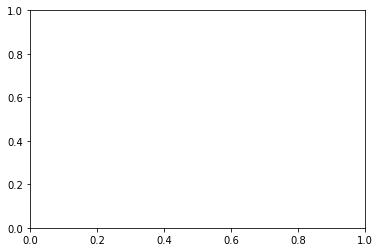

In [ ]:
#Lets deal with np.log and Robust scaler

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(dataframe_tr.drop(columns=['label']).values)

#Transform and svae to X
X = scaler.transform(dataframe_tr.drop(columns=['label']).values)
Y = dataframe['label'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=20, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=20, max_samples=0.8, max_features=0.8)

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]


grid = itertools.product([0,1],repeat=2)

for clf, label_, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, Y_train, cv=3, scoring='f1')
    print("%s F1 Socre: %.6f (+/- %.4f) " %(label_, scores.mean(), scores.std()))
    clf.fit(X_train, Y_train)

print("\n\n\n")
for clf, label_ in zip(clf_list, label): 
  predictions = clf.predict(X_validation)
  print("{0}  : Accuracy score : {1}".format(label_, clf.score(X_validation, Y_validation)))
  print("{0}  : F1 score {1}".format(label_, f1_score(predictions, Y_validation)))

#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, Y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

In [ ]:
#Lets choose np.log and minmax and Grid search for parameters

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler

criterion = ['gini', 'entropy']
max_depth = [4,6,8,12,16,20,24,28]
splitter = ['best', 'random']
parameters = dict(criterion=criterion, max_depth=max_depth, splitter=splitter)
####Minmaxand log transformation start

scaler = MinMaxScaler()
scaler.fit(dataframe_tr.drop(columns=['label']).values)

#Transform and svae to X
X = scaler.transform(dataframe_tr.drop(columns=['label']).values)
Y = dataframe['label'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

####end of transformation

model = DecisionTreeClassifier()

clf = GridSearchCV(model, parameters)

# Fit the grid search
clf.fit(X_train, Y_train)

# View The Best Parameters
print('Best Criterion:', clf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['max_depth'])
print("Best score : ", clf.best_score_)

#Predictions
model = clf.best_estimator_
predictions = model.predict(X_validation)
print("F1 Score : ", f1_score(Y_validation, predictions))
clf.best_estimator_


Best Criterion: gini
Best max_depth: 8
Best score :  0.9359804628072703
F1 Score :  0.9619530754597335


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')